# Mini-Project 7 
## HMM robot 
 ## George Tzanetakeis
## CSC421
## Jiazhuo Jiang
## V00892165
 

This project is based on material from Chapter 15 Probabilistic Reasoning over time that we have covered.
The idea is to use filtering to track a roboc in an environment with no landmarks. The environment is represented as a n by m rectangular grid. The robot's location is hidden; the only evidence available to the observer is a noisy location sensor that gives an approximation to the robot's location. If the robot is at location (x,y) then: 

1. With probability 0.1 the sensor gives the correct location
2. With probability 0.05 it reports one of the 8 locations immediately surrounding (x,y) 
3. With probability 0.025 it reports one of the 16 locations surrounding those 8
4. With the remaining probability of 0.1 it report 'no reading' 

The robot's movement policy is to pick a direction and follow it with probability 0.7 on each step; the robot switches to a randomly selected new heading with probability .3 (or with probability 1 if it encounters a wall). 


1. Implement the movement poliy of the robot and show how it works by drawing a path in a rectangular grid for different stochastic simulations of the movement **(basic - 2 points)** 
2. Describe using text and markdown how this problem can be formulated as an HMM **(basic - 2 points)**. 
3. Use the HMM and sampling to generate both the true movement of the robot as well as locations provided by the observation sensor. Draw the true path as well as the sensor path with different colors on a rectangular grid **(expected - 2 points)** 
4. Use just the generated observed samples (not the hidden states) to estimate the parameters of the HMM i.e the transition and observations matrices **(expected - 2 points)** 
5. Given a different sequences of observed samples (the noisy sensor path) estimate the true path (the locations/hidden states). Compare the true path, noisy path, most likely path estimated using the original specified model as well as the one estimated from data. Show the resulting paths with different colors on a rectangular grid **(advanced - 2 points) ** 





In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools

In [3]:
M, N = 100, 100

#1

In [5]:
def robot_next(x, y, dire):
    # space
    states = []
    for d in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        if d == dire:
            continue
        if (0 <= x + d[0] < M) and (0 <= y + d[1] < N):
            states.append(d)
    if (0 <= x + dire[0] < M) and (0 <= y + dire[1] < N):
        if np.random.rand() < 0.7:
            return (x + dire[0], y + dire[1]), dire
    
    dire = random.choice(states)
    return (x + dire[0], y + dire[1]), dire

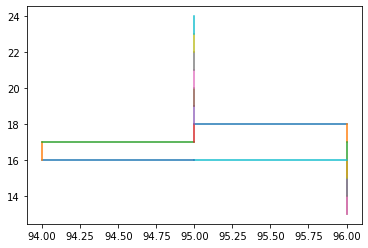

In [6]:
movement = []
# init
x, y = np.random.randint(0, 99, 2)
dire = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])
movement.append((x, y))
for _ in range(20):
    (x, y), dire = robot_next(x, y, dire)
    movement.append((x, y))

movement = np.array(movement)
for i in range(len(movement) - 1):
    plt.plot(movement[i:i+2, 0], movement[i:i+2, 1])

In [7]:
movement

array([[95, 18],
       [96, 18],
       [96, 17],
       [96, 16],
       [96, 15],
       [96, 14],
       [96, 13],
       [96, 14],
       [96, 15],
       [96, 16],
       [95, 16],
       [94, 16],
       [94, 17],
       [95, 17],
       [95, 18],
       [95, 19],
       [95, 20],
       [95, 21],
       [95, 22],
       [95, 23],
       [95, 24]])

#2

The state transition matrix of the machine is (where $d1, d2, d3, d4$are four different directions): 

| | $d1$  | $d2$ | $d3$ | $d4$ |
| - | - | - | - | - |
$d1$ | 0.7 | 0.1 | 0.1 | 0.1 |
$d2$ | 0.1 | 0.7 | 0.1 | 0.1 |
$d3$ | 0.1 | 0.1 | 0.7 | 0.1 |
$d4$ | 0.1 | 0.1 | 0.1 | 0.7 |

The observation matrix of the observer is:

| | x,y  | x +- 1,y +- 1 | x +- 2, y +- 2 |
| - | - | - | - |
$x,y$ | 0.1 | 0.05 | 0.0025 |


#3

In [8]:
def sample_sensor(x, y):
    r = np.random.rand()
    if r <= 0.1:
        return x, y
    elif r <= 0.2:
        return "no reading"
    elif r <= 0.6:     
        xs = [x+dx for dx in [-1, 0, 1] if (0 <= x + dx < M)]
        ys = [y+dy for dy in [-1, 0, 1] if (0 <= y + dy < M)]
        states = [pos for pos in itertools.product(xs, ys) if pos != (x, y)]
        return random.choice(states)
    else:
        xs = [x+dx for dx in [-2, 0, 2] if (0 <= x + dx < M)]
        ys = [y+dy for dy in [-2, 0, 2] if (0 <= y + dy < M)]
        states = [pos for pos in itertools.product(xs, ys) if pos != (x, y)]
        return random.choice(states)

In [9]:
movement = []
sensor = []
# init
x, y = np.random.randint(0, 99, 2)
dire = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])
movement.append((x, y))
sensor.append(sample_sensor(x, y))
for _ in range(20):
    (x, y), dire = robot_next(x, y, dire)
    movement.append((x, y))
    sensor.append(sample_sensor(x, y))

In [10]:
print("The trajectory of the robot is:", movement)
print("The result observed by the observer:", sensor)

The trajectory of the robot is: [(89, 29), (89, 28), (88, 28), (87, 28), (87, 27), (87, 26), (87, 25), (87, 26), (88, 26), (89, 26), (90, 26), (91, 26), (91, 27), (90, 27), (89, 27), (88, 27), (88, 26), (89, 26), (90, 26), (90, 27), (90, 28)]
The result observed by the observer: [(90, 28), (87, 26), (88, 27), (88, 29), 'no reading', (87, 27), (85, 25), (89, 24), (90, 24), (90, 25), (91, 25), (91, 26), (91, 27), (92, 27), (91, 29), (88, 25), (88, 27), (88, 25), (92, 24), (89, 27), 'no reading']


#4

In [11]:
# samples
n_sample = 1000
observed = []

# init
x, y = np.random.randint(0, 99, 2)
dire = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])
observed.append(sample_sensor(x, y))
for _ in range(n_sample-1):
    (x, y), dire = robot_next(x, y, dire)
    observed.append(sample_sensor(x, y))
    
# no reading pro
p1 = observed.count("no reading") / len(observed)

print("P(no reading)", p1)

P(no reading) 0.114


#5

In [12]:
n_sample = 1000
observed = []
movement = []

# init
x, y = np.random.randint(0, 99, 2)
dire = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])
movement.append((x, y))
observed.append(sample_sensor(x, y))
for _ in range(n_sample-1):
    (x, y), dire = robot_next(x, y, dire)
    movement.append((x, y))
    observed.append(sample_sensor(x, y))

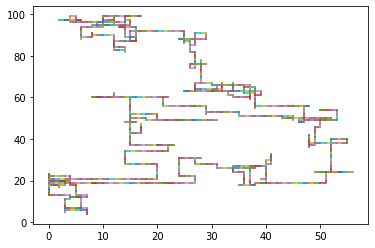

In [13]:
movement = np.array(movement)
for i in range(len(movement) - 1):
    plt.plot(movement[i:i+2, 0], movement[i:i+2, 1])